# Group 80
Rigphel Dorjee - u3241944,
Sonam Thinley - u3245965

# Evaluating Algorithms for Diabetes Dataset using MLP, Logistic Regression, SVM Classifier and Decisoin Tree

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('diabetes.csv')

# Exploratory Data Analysis


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Checking for the Zero Values in Dataset
print("No. of Zero Values in Glucose ", df[df['Glucose']==0].shape[0])
print("No. of Zero Values in Blood Pressure ", df[df['BloodPressure']==0].shape[0])
print("No. of Zero Values in SkinThickness ", df[df['SkinThickness']==0].shape[0])
print("No. of Zero Values in Insulin ", df[df['Insulin']==0].shape[0])
print("No. of Zero Values in BMI ", df[df['BMI']==0].shape[0])
print("No. of Zero Values in AGE ", df[df['Age']==0].shape[0])


No. of Zero Values in Glucose  5
No. of Zero Values in Blood Pressure  35
No. of Zero Values in SkinThickness  227
No. of Zero Values in Insulin  374
No. of Zero Values in BMI  11
No. of Zero Values in AGE  0


In [8]:
# Replacing zeroes with mean of that Columns
df['Glucose']=df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0, df['BMI'].mean())

In [9]:
print("No. of Zero Values in Glucose ", df[df['Glucose']==0].shape[0])
print("No. of Zero Values in Blood Pressure ", df[df['BloodPressure']==0].shape[0])
print("No. of Zero Values in SkinThickness ", df[df['SkinThickness']==0].shape[0])
print("No. of Zero Values in Insulin ", df[df['Insulin']==0].shape[0])
print("No. of Zero Values in BMI ", df[df['BMI']==0].shape[0])


No. of Zero Values in Glucose  0
No. of Zero Values in Blood Pressure  0
No. of Zero Values in SkinThickness  0
No. of Zero Values in Insulin  0
No. of Zero Values in BMI  0


In [10]:
df['Outcome'].unique()

array([1, 0])

# Data Visualization:

<Axes: >

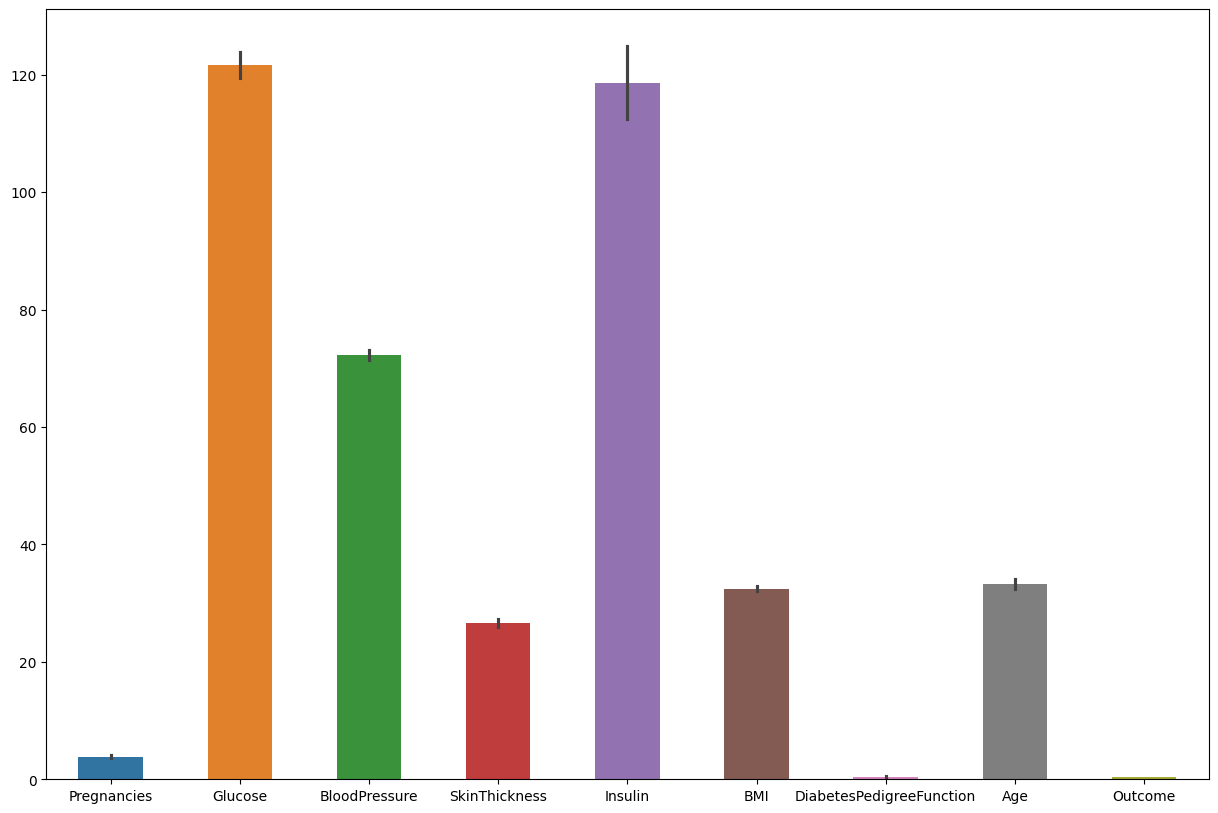

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=df, width= 0.5,ax=ax)

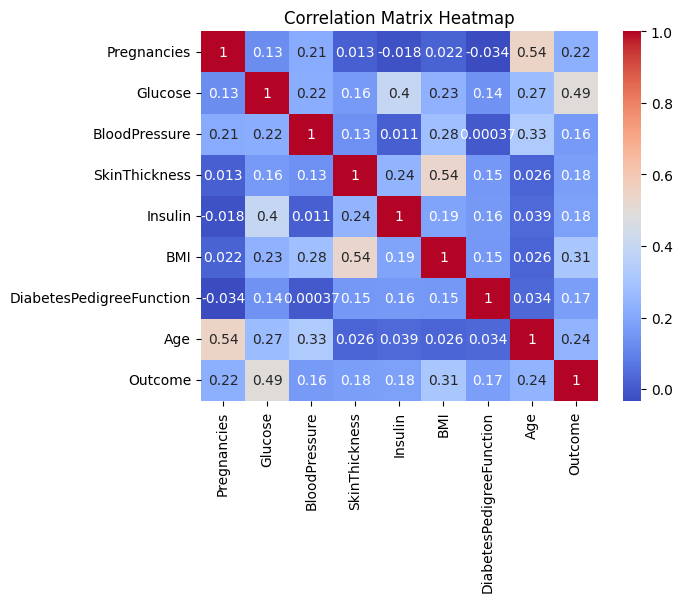

In [12]:
# Corelation Matrix 
correlation_matrix = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Diabetes Negative (0): 500
Diabetes Positive (1): 268


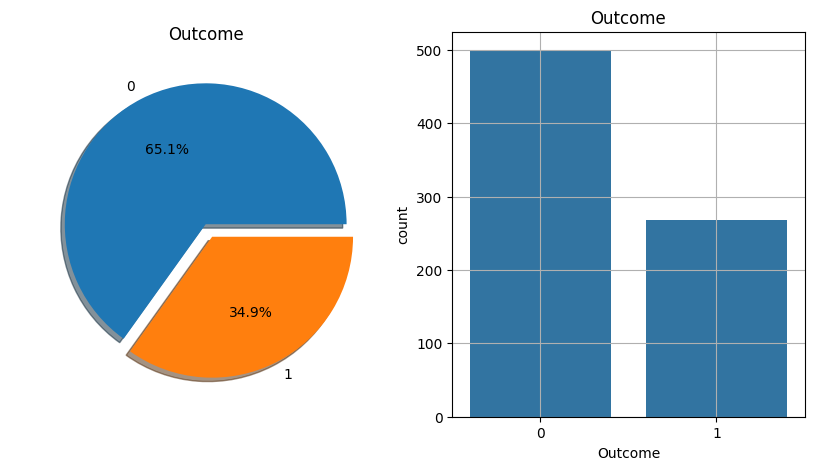

In [13]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for Outcome distribution
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel(' ')

# Count plot for Outcome distribution
sns.countplot(x='Outcome', data=df, ax=ax[1])  # Use 'x' instead of 'Outcome'
ax[1].set_title('Outcome')

# Displaying class distribution
N, P = df['Outcome'].value_counts()
print('Diabetes Negative (0):', N)
print('Diabetes Positive (1):', P)

# Adding grid and showing plots
plt.grid()
plt.show()

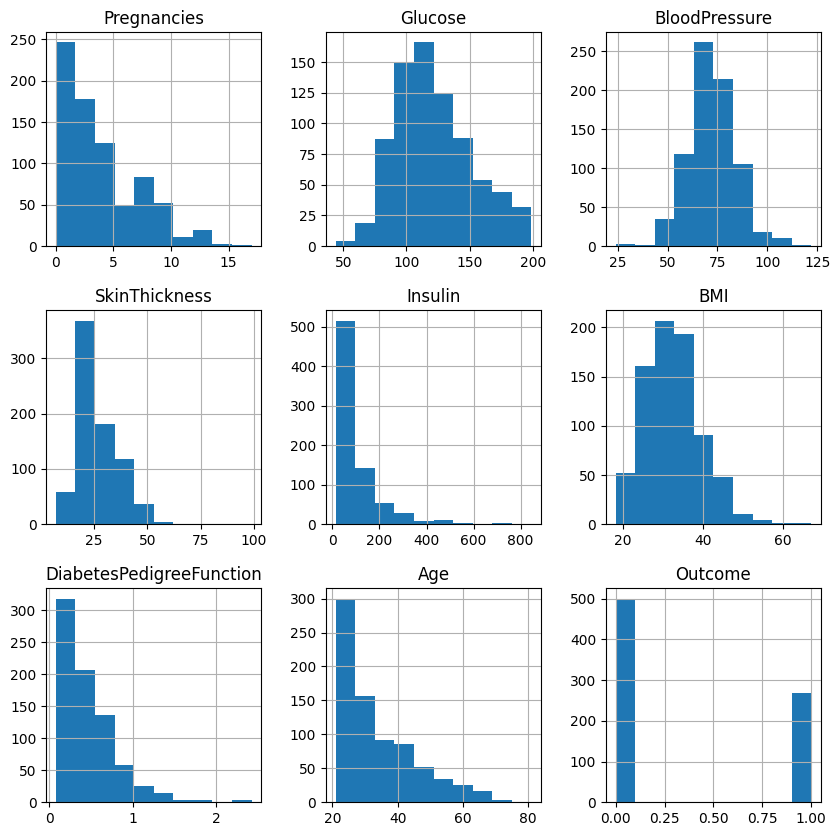

In [14]:
# histograms
df.hist(bins=10, figsize=(10, 10))
plt.show()

/opt/homebrew/anaconda3/envs/soft/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


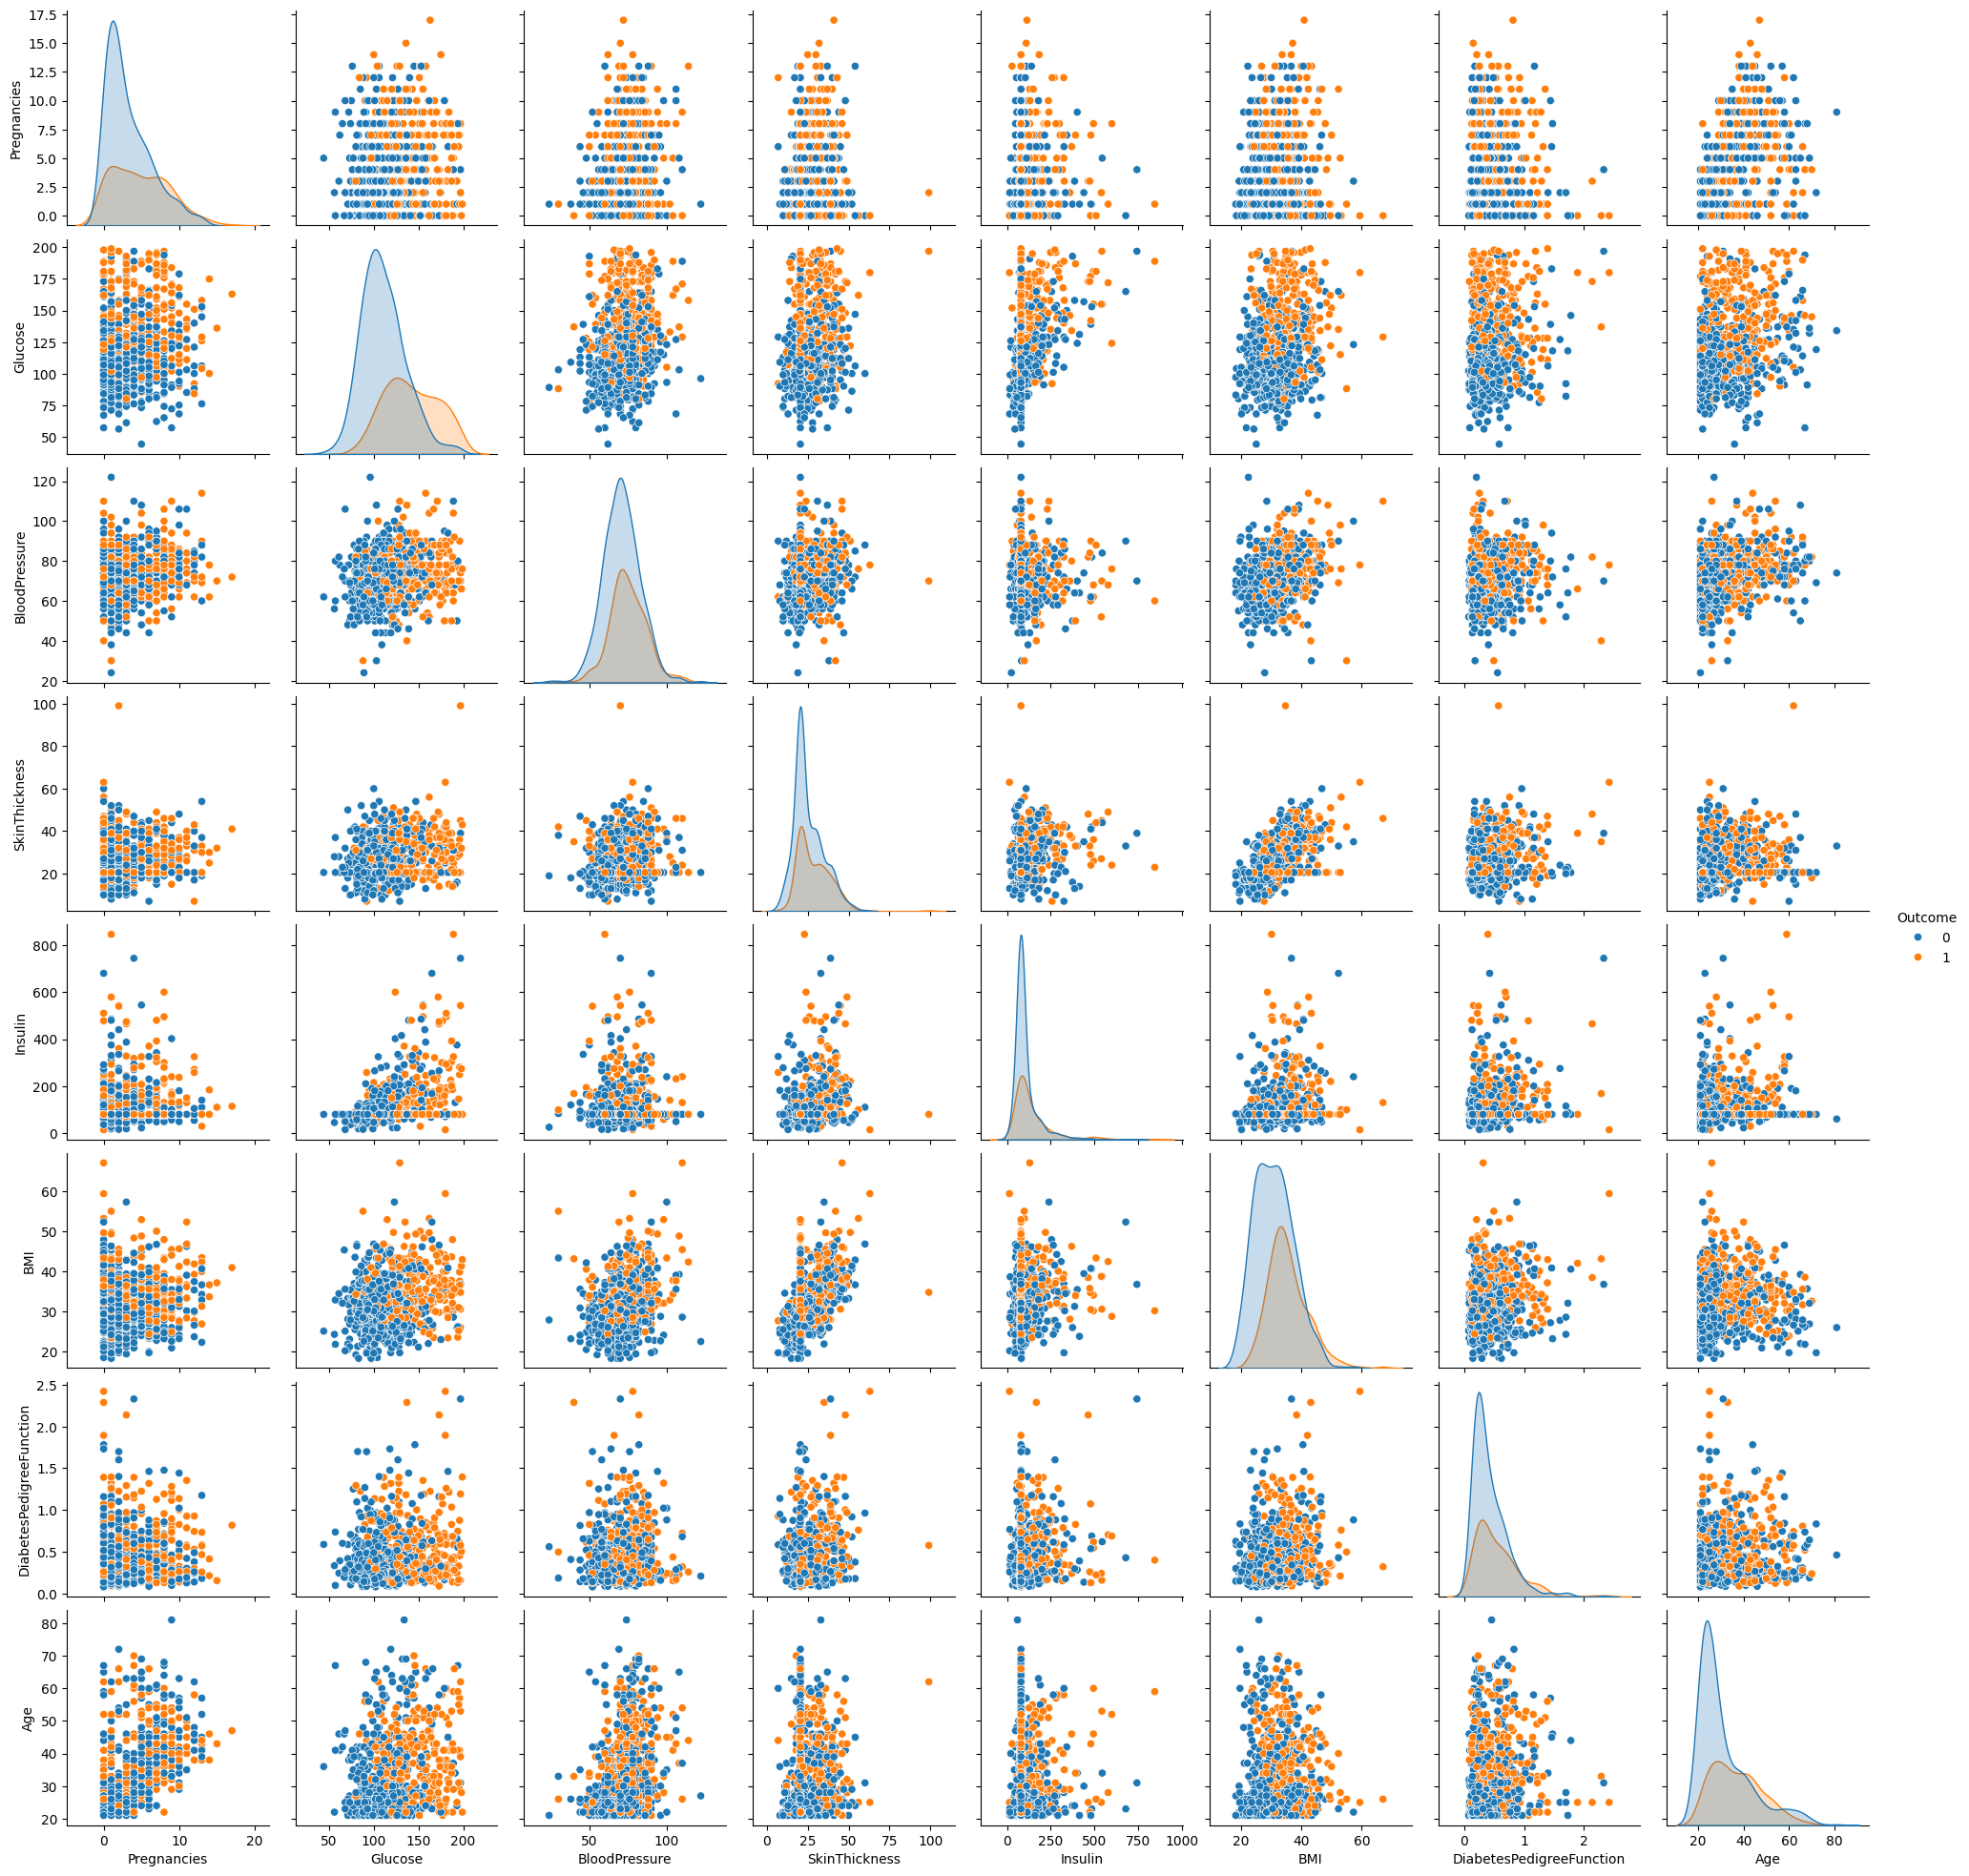

In [15]:
# pari plot
sns.pairplot(data=df, hue='Outcome')
plt.show()

# Spliting the Dataframe into train and test set

In [16]:
X = df.drop(['Outcome'], axis=1).values
y = df['Outcome'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# converting data arrays into pytorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Multilayer Perceptron

In [20]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim) 
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


input_dim = X_train.shape[1]
output_dim = 2
mlp_model = MLP(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer_mlp = optim.Adam(mlp_model.parameters(), lr=0.0001)


def train_network(model, optimizer, criterion, X_train, y_train, X_test, y_test, num_epochs, train_losses, test_losses):
    for epoch in range(num_epochs):
        optimizer.zero_grad()

        output_train = model(X_train)

        loss_train = criterion(output_train, y_train)

        loss_train.backward()

        optimizer.step()
        

        output_test = model(X_test)
        loss_test = criterion(output_test, y_test)
        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(
                f'Epoch {epoch + 1}/{num_epochs},'
                f' Train Loss: {loss_train.item(): .4f},'
                f' Test Loss: {loss_test.item(): .4f}')


num_epochs = 1500
train_losses = np.zeros(num_epochs)
test_losses = np.zeros(num_epochs)


train_network(mlp_model, optimizer_mlp, criterion, X_train, y_train, X_test, y_test, num_epochs, train_losses, test_losses)


Epoch 50/1500, Train Loss:  0.6329, Test Loss:  0.6427
Epoch 100/1500, Train Loss:  0.5733, Test Loss:  0.6007
Epoch 150/1500, Train Loss:  0.5398, Test Loss:  0.5403
Epoch 200/1500, Train Loss:  0.5112, Test Loss:  0.5643
Epoch 250/1500, Train Loss:  0.4964, Test Loss:  0.4934
Epoch 300/1500, Train Loss:  0.4841, Test Loss:  0.5323
Epoch 350/1500, Train Loss:  0.4751, Test Loss:  0.5372
Epoch 400/1500, Train Loss:  0.4584, Test Loss:  0.5138
Epoch 450/1500, Train Loss:  0.4650, Test Loss:  0.5260
Epoch 500/1500, Train Loss:  0.4600, Test Loss:  0.5509
Epoch 550/1500, Train Loss:  0.4525, Test Loss:  0.5105
Epoch 600/1500, Train Loss:  0.4614, Test Loss:  0.4988
Epoch 650/1500, Train Loss:  0.4437, Test Loss:  0.5417
Epoch 700/1500, Train Loss:  0.4412, Test Loss:  0.5304
Epoch 750/1500, Train Loss:  0.4354, Test Loss:  0.5128
Epoch 800/1500, Train Loss:  0.4289, Test Loss:  0.4993
Epoch 850/1500, Train Loss:  0.4471, Test Loss:  0.5342
Epoch 900/1500, Train Loss:  0.4360, Test Loss:  

In [21]:

predictions_train = []
predictions_test = []
with torch.no_grad():
    predictions_train = mlp_model(X_train)
    predictions_test = mlp_model(X_test)

def get_accuracy_multiclass(pred_arr, original_arr):
    if len(pred_arr) != len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred = []
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))

    final_pred = np.array(final_pred)
    count = 0
    
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count += 1
    return count / len(final_pred)


train_acc = get_accuracy_multiclass(predictions_train, y_train)
test_acc = get_accuracy_multiclass(predictions_test, y_test)


Training Accuracy: 81.107
Test Accuracy: 75.974
Classification Report for MLP:
               precision    recall  f1-score   support

 No Diabetes       0.82      0.81      0.81        99
    Diabetes       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



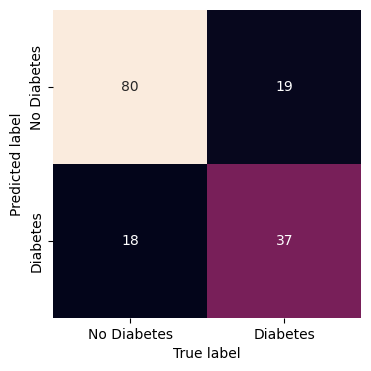

In [22]:

print(f'Training Accuracy: {round(train_acc * 100, 3)}')
print(f'Test Accuracy: {round(test_acc * 100, 3)}')

# Generating predictions for the test set
_, predicted_mlp = torch.max(predictions_test, 1)

conf_matrix_mlp = confusion_matrix(y_test.numpy(), predicted_mlp.numpy())

y_test_numpy = y_test.numpy()

classification_rep = classification_report(y_test_numpy, predicted_mlp, target_names=['No Diabetes', 'Diabetes'])

print("Classification Report for MLP:\n", classification_rep)

# Visualizing the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mlp, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

# TUNING THE ALGORITHMS
Comparing before and after hyperparameter tuning

## Tuning the Logistic Regression Model


Before hyperparameter tuning
              precision    recall  f1-score   support

 No Diabetes       0.81      0.84      0.82        99
    Diabetes       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



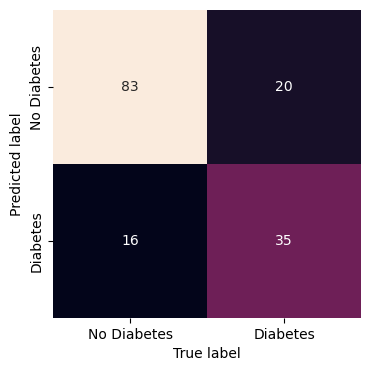

After hyperparameter tuning
Best Hyperparameters: {'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
              precision    recall  f1-score   support

 No Diabetes       0.80      0.87      0.83        99
    Diabetes       0.72      0.62      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



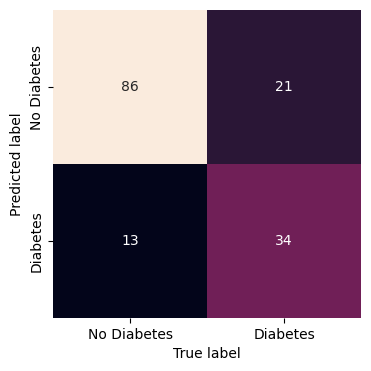

[[86 13]
 [21 34]]


In [33]:

lr = LogisticRegression(solver='liblinear', multi_class='ovr')

lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

mat = confusion_matrix(y_test, lr_pred)
print('Before hyperparameter tuning')

accuracy = accuracy_score(y_test, lr_pred)
report = classification_report(y_test, lr_pred, target_names=['No Diabetes', 'Diabetes'])

print(report)

plt.figure(figsize=(6, 4))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

# Parameter Tuning 

# Defining a grid of hyperparameters to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],
    'max_iter': [200, 300, 400] 
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print('After hyperparameter tuning')

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

tuned_lr = grid_search.best_estimator_

tuned_lr_pred = tuned_lr.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, tuned_lr_pred)
report = classification_report(y_test, tuned_lr_pred, target_names=['No Diabetes', 'Diabetes'])

print(report)

mat = confusion_matrix(y_test, tuned_lr_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()
print(mat)

## Tuning the SVM Classifier

Before Hyper Parameters tuning
Accuracy: 0.7337662337662337
              precision    recall  f1-score   support

 No Diabetes       0.77      0.83      0.80        99
    Diabetes       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



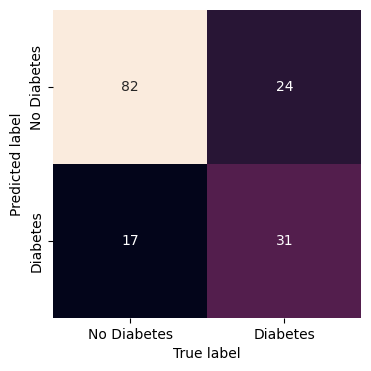

After Hyper Parameters tuning
Best Hyper Parameters: {'C': 5, 'class_weight': 'balanced', 'kernel': 'linear'}
Accuracy: 0.7012987012987013
              precision    recall  f1-score   support

 No Diabetes       0.80      0.71      0.75        99
    Diabetes       0.57      0.69      0.62        55

    accuracy                           0.70       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154



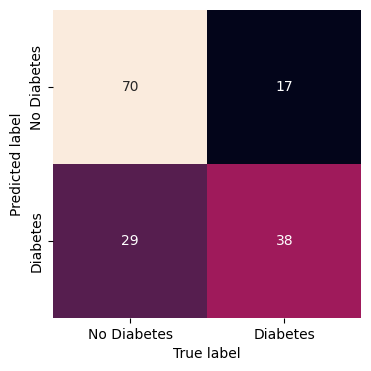

In [24]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


svm_classifier = SVC()

svm_classifier.fit(X_train, y_train)

svm_pred = svm_classifier.predict(X_test)

print('Before Hyper Parameters tuning')

print("Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred, target_names=['No Diabetes', 'Diabetes']))

mat = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(6,4))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()


svm_params = svm_classifier.get_params()
svm_params

from sklearn.model_selection import GridSearchCV
model = SVC(probability=True)


param_grid = [{'C': [0.5, 0.1, 1, 5, 10], 'kernel': ['linear'], 'class_weight': ['balanced']},
  {'C': [0.5, 0.1, 1, 5, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.005, 0.05, 0.5], 
   'kernel': ['rbf'], 'class_weight': ['balanced']}]


grs = GridSearchCV(model, param_grid)
grs.fit(X_train, y_train)

print('After Hyper Parameters tuning')

print("Best Hyper Parameters:",grs.best_params_)

tuned_svm_model = grs.best_estimator_

tuned_svm_pred = tuned_svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, tuned_svm_pred))
print(classification_report(y_test, tuned_svm_pred, target_names=['No Diabetes', 'Diabetes']))

mat = confusion_matrix(y_test, tuned_svm_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

##  Tuning the DT classifier

Before hyperparameters tuning
Accuracy: 0.7337662337662337
              precision    recall  f1-score   support

 No Diabetes       0.77      0.83      0.80        99
    Diabetes       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



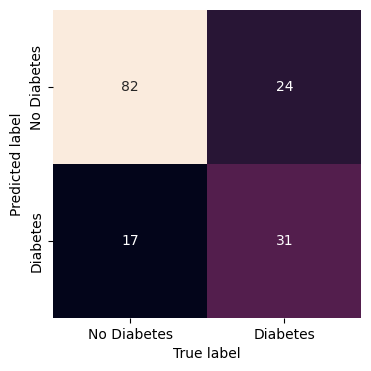

After hyperparameters tuning
Best Hyper Parameters: {'criterion': 'entropy', 'max_depth': 4}
Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

 No Diabetes       0.86      0.67      0.75        99
    Diabetes       0.57      0.80      0.67        55

    accuracy                           0.71       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.76      0.71      0.72       154



Text(124.22222222222221, 0.5, 'Predicted label')

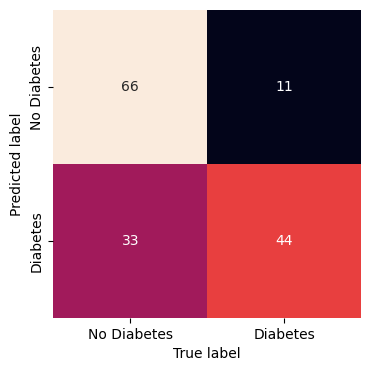

In [25]:
from sklearn.model_selection import GridSearchCV

dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train)

dt_pred = svm_classifier.predict(X_test)

print('Before hyperparameters tuning')

print("Accuracy:",accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred, target_names=['No Diabetes', 'Diabetes']))

mat = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(6,4))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

dt_model = DecisionTreeClassifier()

params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10)}

grs = GridSearchCV(dt_model, param_grid=params)
grs.fit(X_train, y_train)

print('After hyperparameters tuning')

print("Best Hyper Parameters:",grs.best_params_)

tuned_dt_model = grs.best_estimator_
tuned_dt_pred = tuned_dt_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test, tuned_dt_pred))
print(classification_report(y_test, tuned_dt_pred, target_names=['No Diabetes', 'Diabetes']))

mat = confusion_matrix(y_test, tuned_dt_pred)
plt.figure(figsize=(6,4))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('True label')
plt.ylabel('Predicted label')

# Accuracy Comparision of all the models

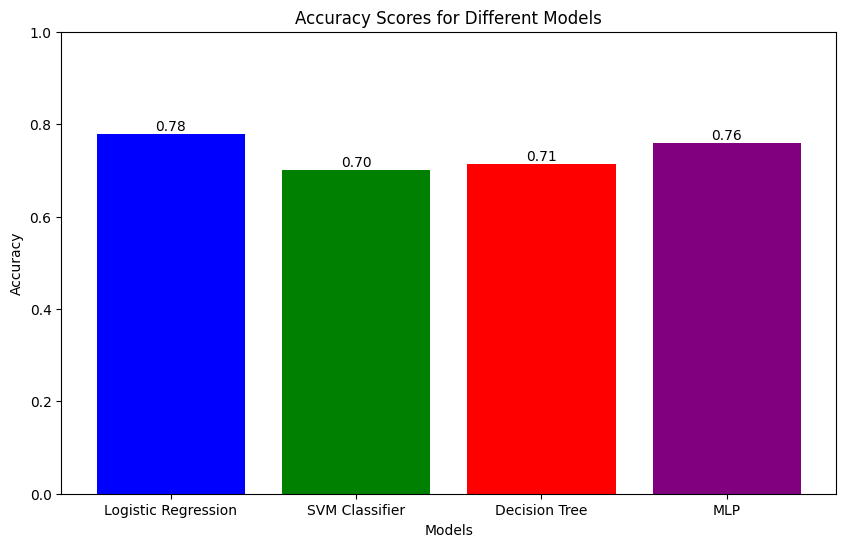

In [26]:
models = ["Logistic Regression", "SVM Classifier", "Decision Tree", "MLP"]

accuracies = [accuracy_score(y_test, tuned_lr_pred), accuracy_score(y_test, tuned_svm_pred), accuracy_score(y_test, tuned_dt_pred), test_acc]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')
plt.ylim(0.0, 1.0)

for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')

plt.show()


# Saving the best model for later use(LR and MLP)
Since MLP has the highest accuracy score we will save the mlp model for later use

In [27]:
import joblib

# saving mlp
model_path = 'mlp_model.pth'

torch.save(mlp_model.state_dict(), model_path)

print(f'MLP model saved to {model_path}')

# saving lr

joblib.dump(lr, 'logistic_regression_model.pkl')
print(f'LR model saved')

MLP model saved to mlp_model.pth
LR model saved


# Loading the saved model for prediction

In [28]:
model_path = 'mlp_model.pth'

loaded_mlp_model = MLP(input_dim, output_dim)  

loaded_mlp_model.load_state_dict(torch.load(model_path))

# Setting the model in evaluation mode
loaded_mlp_model.eval()

MLP(
  (fc1): Linear(in_features=8, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)

In [29]:
# loading MlP saved model

model_path = 'mlp_model.pth'

# Defining the input_dim and output_dim to match the model architecture
input_dim = X_test.shape[1]
output_dim = 2

loaded_mlp_model = MLP(input_dim, output_dim) 

loaded_mlp_model.load_state_dict(torch.load(model_path))

loaded_mlp_model.eval()

# Converting data to PyTorch tensors
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Making predictions using the loaded model
with torch.no_grad():
    predictions = loaded_mlp_model(X_test_tensor)
    predicted_labels = torch.argmax(predictions, axis=1)

# Calculating accuracy
correct_predictions = (predicted_labels == y_test_tensor).sum().item()
total_samples = len(y_test)
accuracy = correct_predictions / total_samples

print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 75.32%


In [30]:
# Loading the saved Logistic Regression model

import joblib
from sklearn.metrics import accuracy_score

saved_model = joblib.load('logistic_regression_model.pkl')

lr_pred = saved_model.predict(X_test)

accuracy = accuracy_score(y_test, lr_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 76.62%
